# Tiktok Regression Course 5 Project

**=================================================================================================================**

## Project Description

Take note the dataset has been cleaned, performed feature selection beforehand

## Business Task

You are a member of the TikTok data analytics team. The team is currently more than halfway through the claims classification project. Earlier, you completed a project proposal, used Python to explore and analyze the claims classification dataset, created data visualizations, and conducted a hypothesis  test. 

The TikTok team has reviewed the results of the hypothesis testing. TikTok’s Operations Lead, Maika Abadi, is interested in how different variables are associated with whether a user is verified. Earlier, the data team observed that if a user is verified, they are much more likely to post opinions. Now, the data team has decided to explore how to predict verified status to help them understand how video characteristics relate to verified users. Therefore, you have been asked to conduct a logistic regression using verified status as the outcome variable. The results may be used to inform the final model related to predicting whether a video is a claim vs an opinion.

**=================================================================================================================**

## Import Libraries

In [1]:
import numpy as np
from numpy import count_nonzero, median, mean
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
#import squarify


import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
# Import variance_inflation_factor from statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Import Tukey's HSD function
from statsmodels.stats.multicomp import pairwise_tukeyhsd

import datetime
from datetime import datetime, timedelta, date

# import shap
# import eli5
# from IPython.display import display

#import os
#import zipfile
import scipy
from scipy import stats
from scipy.stats.mstats import normaltest # D'Agostino K^2 Test
from scipy.stats import boxcox
from collections import Counter

import sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder, PolynomialFeatures

from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import train_test_split, cross_validate

from sklearn.metrics import accuracy_score, auc, classification_report, confusion_matrix, f1_score, roc_auc_score
from sklearn.metrics import precision_score, recall_score, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.feature_selection import f_regression, f_classif, chi2, RFE, RFECV
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif
from sklearn.feature_selection import VarianceThreshold, GenericUnivariateSelect
from sklearn.feature_selection import SelectFromModel, SelectKBest, SelectPercentile

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

import imblearn

from imblearn.under_sampling import RandomUnderSampler, CondensedNearestNeighbour
from imblearn.under_sampling import EditedNearestNeighbours, TomekLinks
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN, SMOTETomek


import feature_engine

from feature_engine.selection import DropConstantFeatures, DropDuplicateFeatures 
from feature_engine.selection import DropCorrelatedFeatures, SmartCorrelatedSelection
from feature_engine.selection import SelectBySingleFeaturePerformance



%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

# This module lets us save our models once we fit them.
# import pickle

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows', None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


## Quick Data Glance

In [37]:
df = pd.read_csv("tiktokmod.csv")

In [45]:
df2 = pd.read_csv("tiktoksmenn.csv")

In [3]:
df.head()

,videoviewcount,videolikecount,videosharecount,videodownloadcount,textlength,claimstatus,banactive,verifiedstatus
0,-0.10,0.69,-0.21,1.91,2.04,1,0,0
1,0.20,-0.42,-0.44,-0.40,0.07,1,1,0
2,-0.53,-0.50,-0.49,-0.48,-1.99,1,1,0
3,-0.56,-0.50,-0.47,-0.46,0.84,1,1,0
4,-0.56,-0.50,-0.49,-0.49,-1.56,1,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14851 entries, 0 to 14850
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   videoviewcount      14851 non-null  float64
 1   videolikecount      14851 non-null  float64
 2   videosharecount     14851 non-null  float64
 3   videodownloadcount  14851 non-null  float64
 4   textlength          14851 non-null  float64
 5   claimstatus         14851 non-null  int64  
 6   banactive           14851 non-null  int64  
 7   verifiedstatus      14851 non-null  int64  
dtypes: float64(5), int64(3)
memory usage: 928.3 KB


In [5]:
df.dtypes.value_counts()

float64    5
int64      3
dtype: int64

In [6]:
# Descriptive Statistical Analysis
df.describe(include="all")

,videoviewcount,videolikecount,videosharecount,videodownloadcount,textlength,claimstatus,banactive,verifiedstatus
count,14851.00,14851.00,14851.00,14851.00,14851.00,14851.00,14851.00,14851.00
mean,0.01,0.00,0.00,0.00,-0.01,0.36,0.84,0.07
std,1.00,1.00,1.00,1.00,1.00,0.48,0.36,0.26
min,-0.57,-0.51,-0.49,-0.49,-2.72,0.00,0.00,0.00
25%,-0.55,-0.50,-0.48,-0.48,-0.70,0.00,1.00,0.00
50%,-0.53,-0.48,-0.45,-0.45,-0.12,0.00,1.00,0.00
75%,0.15,0.03,-0.11,-0.10,0.60,1.00,1.00,0.00
max,3.64,5.83,4.79,5.38,4.54,1.00,1.00,1.00


In [7]:
# Descriptive Statistical Analysis
df.describe(include=["int", "float"])

,videoviewcount,videolikecount,videosharecount,videodownloadcount,textlength,claimstatus,banactive,verifiedstatus
count,14851.00,14851.00,14851.00,14851.00,14851.00,14851.00,14851.00,14851.00
mean,0.01,0.00,0.00,0.00,-0.01,0.36,0.84,0.07
std,1.00,1.00,1.00,1.00,1.00,0.48,0.36,0.26
min,-0.57,-0.51,-0.49,-0.49,-2.72,0.00,0.00,0.00
25%,-0.55,-0.50,-0.48,-0.48,-0.70,0.00,1.00,0.00
50%,-0.53,-0.48,-0.45,-0.45,-0.12,0.00,1.00,0.00
75%,0.15,0.03,-0.11,-0.10,0.60,1.00,1.00,0.00
max,3.64,5.83,4.79,5.38,4.54,1.00,1.00,1.00


In [ ]:
# Descriptive Statistical Analysis
df.describe(include="object")

In [8]:
df.verifiedstatus.value_counts(normalize=True)

0   0.93
1   0.07
Name: verifiedstatus, dtype: float64

In [9]:
df.shape

(14851, 8)

In [10]:
df.columns

Index(['videoviewcount', 'videolikecount', 'videosharecount', 'videodownloadcount', 'textlength', 'claimstatus', 'banactive', 'verifiedstatus'], dtype='object')

## Data Visualization

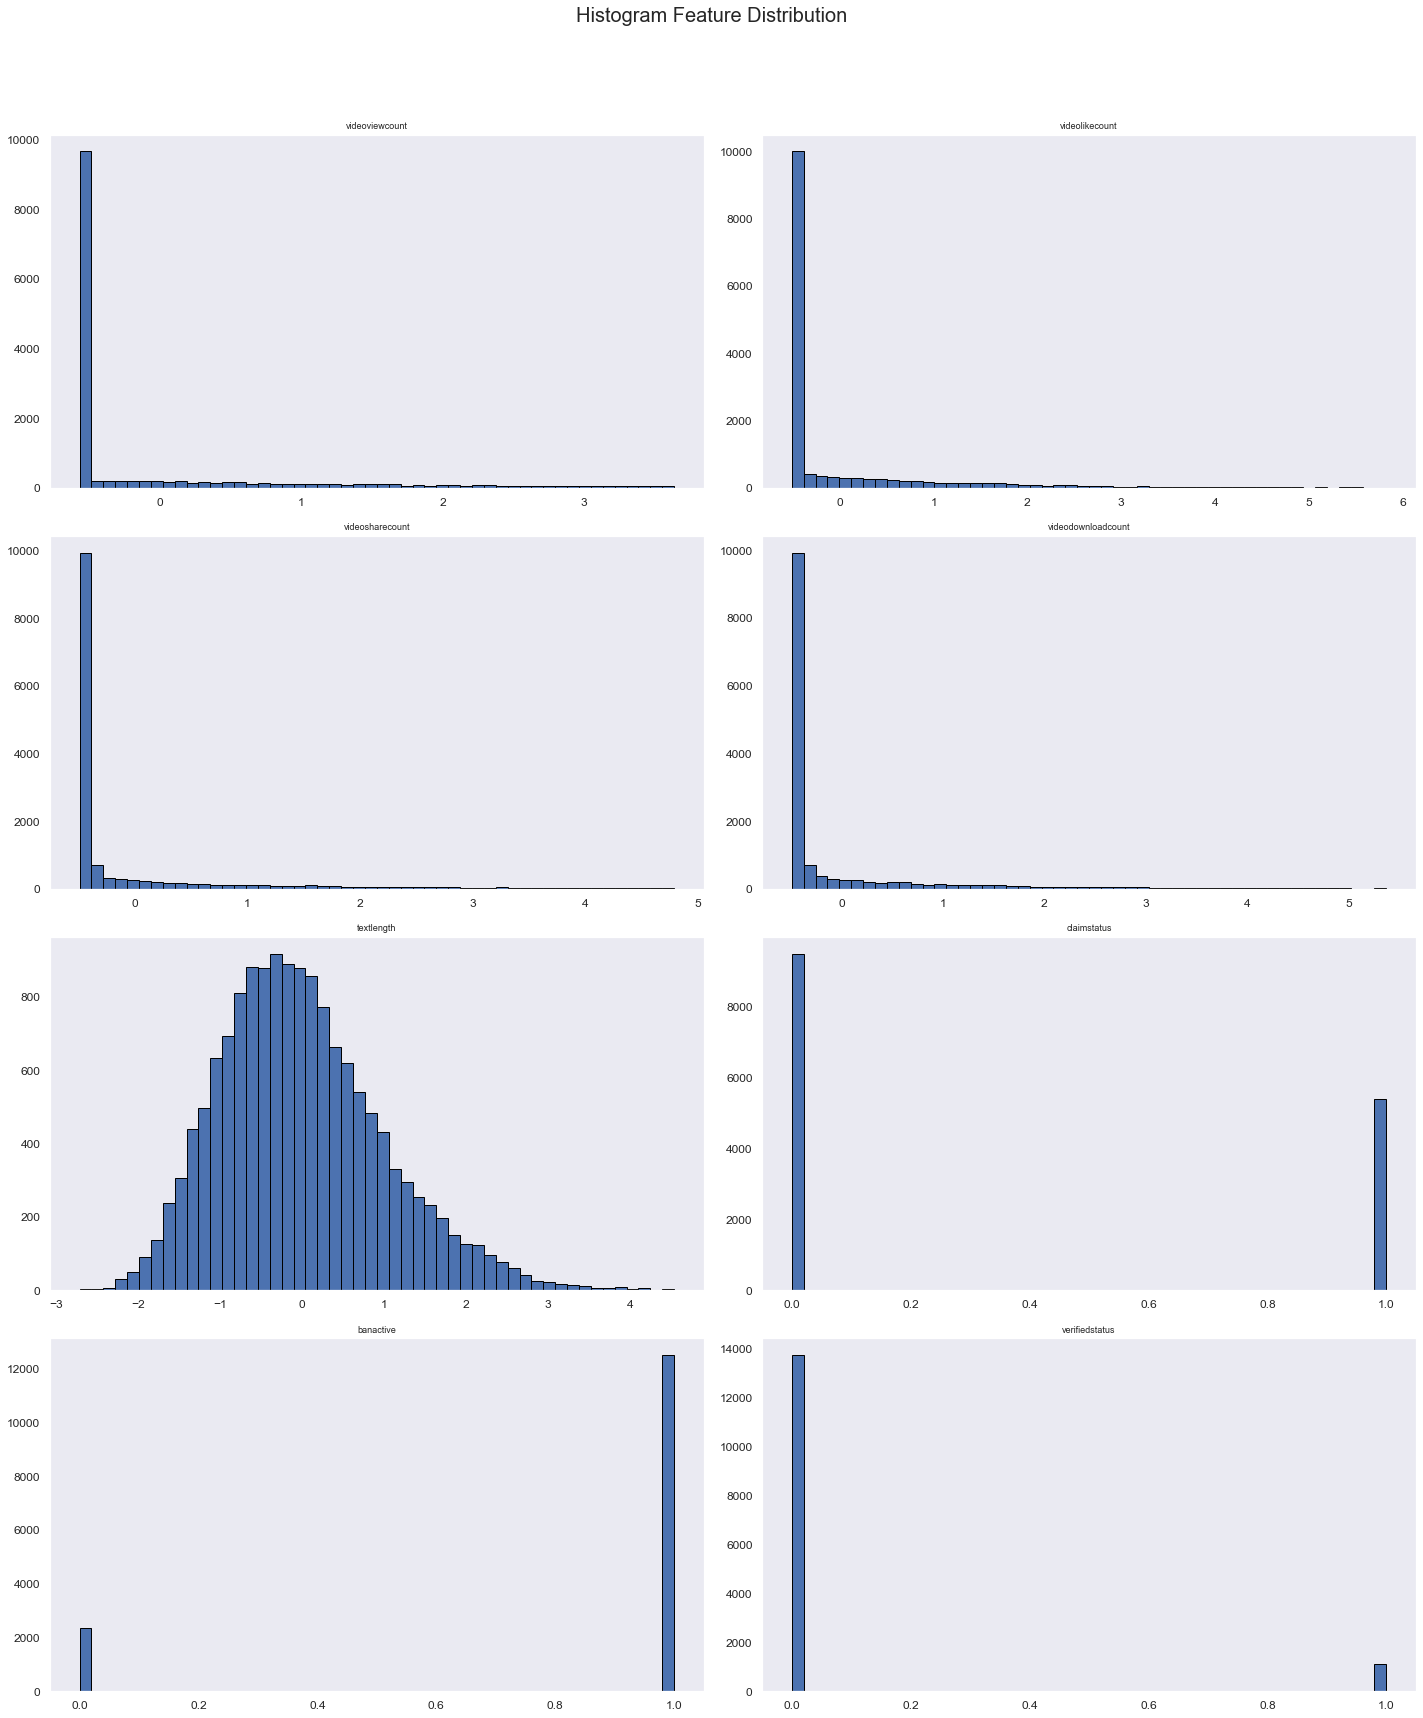

In [11]:
df.hist(bins=50, figsize=(20,45), grid=False, layout=(len(df.columns),2), edgecolor = 'black')
plt.suptitle('Histogram Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)
plt.tight_layout()
plt.show()

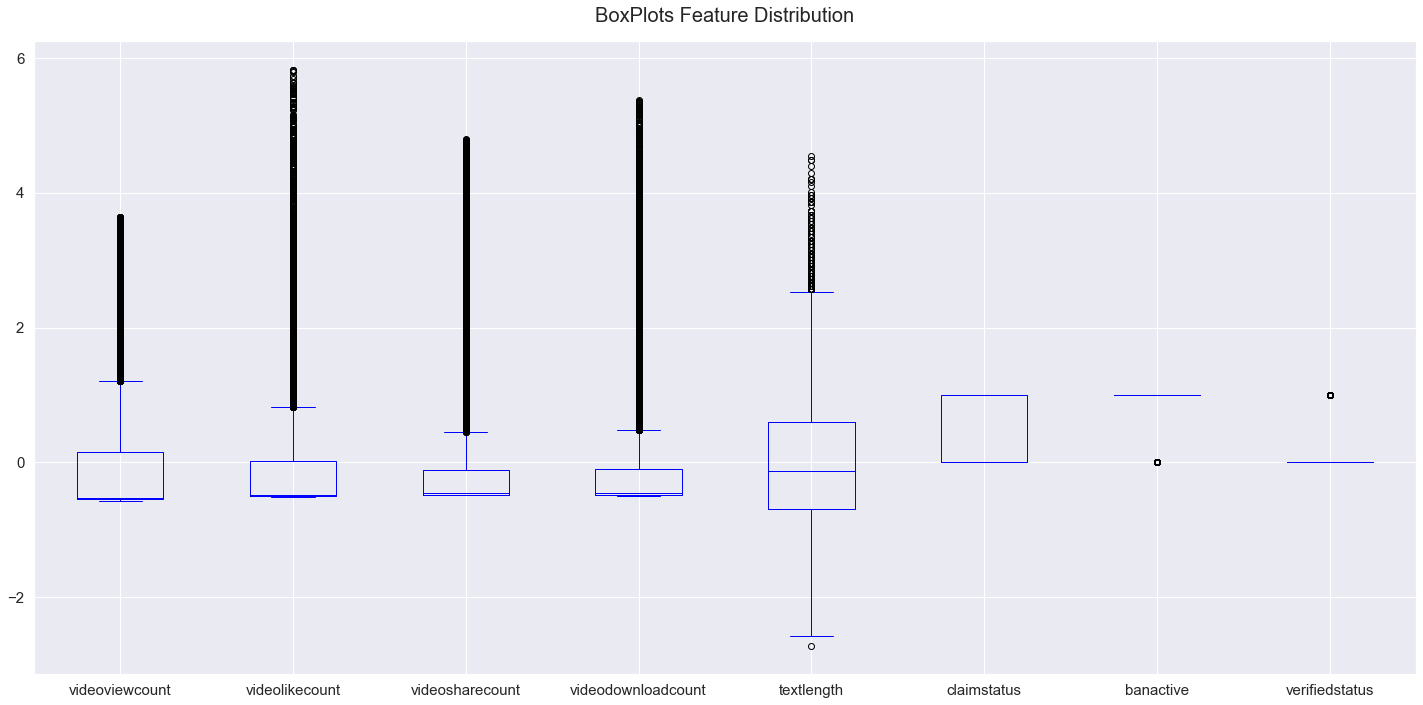

In [12]:
df.boxplot(figsize=(20,10), color="blue", fontsize = 15)
plt.title('BoxPlots Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)
plt.tight_layout()
plt.show()

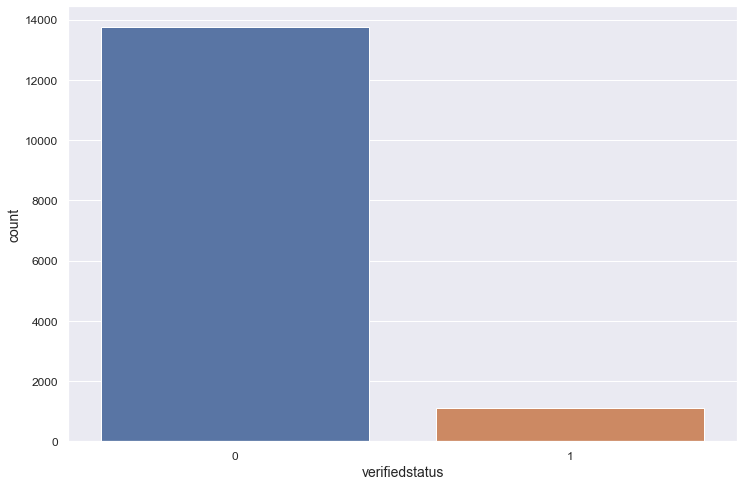

In [13]:
fig, ax = plt.subplots(figsize=(12,8))
sns.countplot(x=df.verifiedstatus, data=df)
plt.show()

In [14]:
df.corr()

,videoviewcount,videolikecount,videosharecount,videodownloadcount,textlength,claimstatus,banactive,verifiedstatus
videoviewcount,1.00,0.69,0.61,0.60,0.22,-0.01,0.02,0.01
videolikecount,0.69,1.00,0.79,0.75,0.19,-0.01,0.02,0.00
videosharecount,0.61,0.79,1.00,0.67,0.18,-0.02,0.02,0.01
videodownloadcount,0.60,0.75,0.67,1.00,0.18,-0.01,0.02,0.01
textlength,0.22,0.19,0.18,0.18,1.00,-0.00,-0.01,0.00
claimstatus,-0.01,-0.01,-0.02,-0.01,-0.00,1.00,-0.32,-0.15
banactive,0.02,0.02,0.02,0.02,-0.01,-0.32,1.00,0.06
verifiedstatus,0.01,0.00,0.01,0.01,0.00,-0.15,0.06,1.00


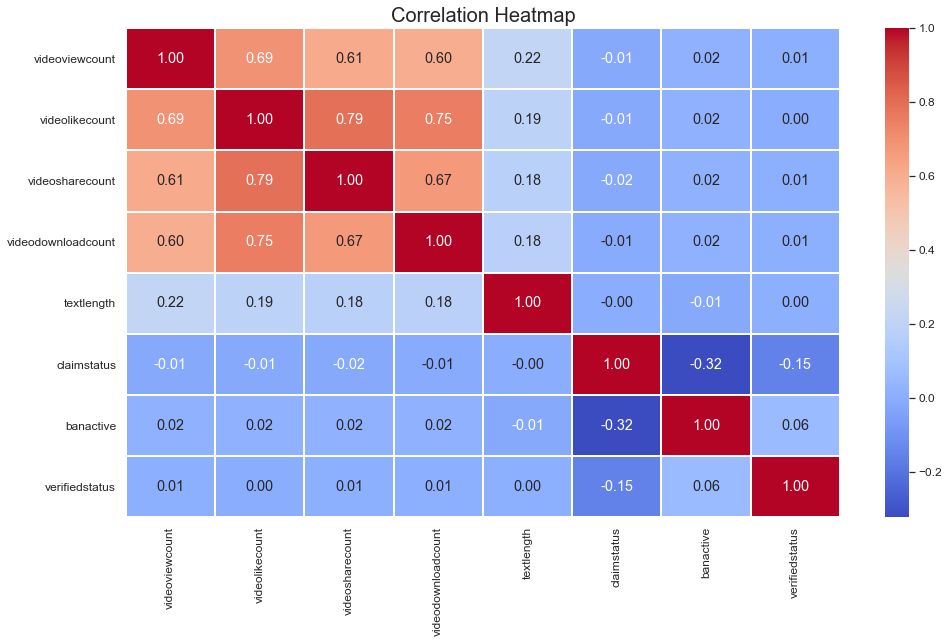

In [15]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.title("Correlation Heatmap", fontsize=20)
plt.show()

**==================================================================================================================**

## Logistic Regression (StatsModel)

In [16]:
df.columns

Index(['videoviewcount', 'videolikecount', 'videosharecount', 'videodownloadcount', 'textlength', 'claimstatus', 'banactive', 'verifiedstatus'], dtype='object')

In [17]:
df.shape

(14851, 8)

In [18]:
X = df.iloc[:,0:7]
y = df.iloc[:,7]

In [19]:
X.values, y.values

(array([[-0.09797245,  0.68668467, -0.20536591, ...,  2.04180011,
          1.        ,  0.        ],
        [ 0.19670816, -0.4220661 , -0.44382737, ...,  0.07166943,
          1.        ,  1.        ],
        [-0.52857541, -0.50392569, -0.4853192 , ..., -1.99456519,
          1.        ,  1.        ],
        ...,
        [ 0.96108853,  0.48486019, -0.10210253, ...,  0.2638773 ,
          0.        ,  1.        ],
        [-0.52635572, -0.50072115, -0.47564555, ..., -0.16859041,
          0.        ,  1.        ],
        [-0.56316978, -0.51049911, -0.48834951, ..., -0.36079828,
          0.        ,  1.        ]]),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64))

In [20]:
X = sm.add_constant(X)

In [21]:
logreg = sm.Logit(y, X).fit()

Optimization terminated successfully.
         Current function value: 0.250563
         Iterations 8


In [22]:
logreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         verifiedstatus   No. Observations:                14851
Model:                          Logit   Df Residuals:                    14843
Method:                           MLE   Df Model:                            7
Date:                Mon, 12 Jun 2023   Pseudo R-squ.:                 0.05348
Time:                        20:06:03   Log-Likelihood:                -3721.1
converged:                       True   LL-Null:                       -3931.3
Covariance Type:            nonrobust   LLR p-value:                 9.696e-87
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -2.2604      0.113    -20.031      0.000      -2.482      -2.039
videoviewcount         0.0093      0.044      0.209      0.835      -0.078       0.096
videolikecount        -0.0791      0.065     -1.209      0.227      -0.207       0.049
videosharecount        0.0681      0.052      1.316      0.188      -0.033       0.170
videodownloadcount     0.0230      0.049      0.467      0.640      -0.073       0.119
textlength             0.0121      0.033      0.372      0.710      -0.052       0.076
claimstatus           -1.6647      0.104    -15.986      0.000      -1.869      -1.461
banactive              0.1196      0.115      1.040      0.298      -0.106       0.345
======================================================================================
"""

### Second Method

`
logitfit = smf.logit(formula = 'Target ~ TNW + C(seg2)', data = df).fit()
`

In [ ]:
logitfit = smf.logit(formula = 'Target ~ TNW + C(seg2)', data = hgcdev).fit()

### Explain the Statistics

Model : OLS : Ordinary Least Squares : One way to create a linear regression model. Minimize the dependent samples so you can estimate the unknown samples when creating a linear regression model.

Method : Least Squares : Fit data to the model by minimizing the residual samples

R-squared : Measure of how well the regression line approximates the data points. If .5 then that is a sign that half of the observed variation can be explained by the models inputs. 1 would be perfectly correlated. 

Adj, R-squared : Reflects the fit of the model. Values range from 0 to 1, where higher values indicate a good fit.

F-statistic : Measures how significantly the data points fit into the regression model by measuring variation of sample means. 

Prob (F-statistic) : Probability that the null hypothesis for the full model is true. Closer to zero the better the samples approach the model.

Log-Likelihood : The conditional probability that the observed data fits the model

AIC : Adjusts the log-likelihood based on the number of observations and complexity of the model. It focuses on the data points that best describe the data.

Df Residuals : Degrees of freedom of the residuals which is the difference between predicted values and the measured data.

BIC : We want a low BIC. It focuses on the shortest description of the data like AIC.

Df Model : Number of parameters in the model

Coefficient Constant : Is your Y intercept. If both dependent and independent coefficients are zero then the expected output would equal the constant coefficient.

Independent Coefficient : Represents the change of the independent variable per unit.

Standard Error : Accuracy of the coefficients

P>|t| : The P Value. A P Value less than .05 is considered statistically significant.

[.025 - .975] : Confidence Interval : Represents the range in which coefficients are likely to fall.

Omnibus : (D’Angostino’s test) : Establishes whether the samples come from a normally distributed population.

Durbin-Watson : Test to see if the errors are not independent. Used to find repeating patterns that may be obstructed by noise. Its value lies between 0 and 4. If greater than 2 this is a sign that relationships between two variables are going in opposite directions (negatively correlated). If less than 2 variables are positively correlated. 

Prob(Omnibus) : Probability of Omnibus

Jarque-Bera : Tests whether the samples match a normal distribution. It never has a negative number and the further it gets from zero signals the data doesn't have a normal distribution. 

Skew : Measure of the asymmetry of the probability distribution. Negative skew indicates the tail is longer on the left and the concentration of the data is on the right. Positive indicates the tail is longer on the right. 0 indicates that the tails are balanced.

Prob(JB) : The probability of Jarque-Bera

Kurtosis : Describes the shape of a probability distribution with a focus on the tails and not the peak. If the value is high that is a sign that there are more outliers. If the value is less than 3 that means there are fewer outliers. A value of 3 points towards a normal distribution. Values greater than 3 indicate more outliers.

Condition Number : Represents whether samples are highly related in our regression model. A large number indicates strong multicollinearity which means that independent variables are highly correlated with each other. This causes problems because a small number of samples are so dramatically different from others that results are corrupted.

**==================================================================================================================**

## Train Test Split

We've prepared our data and we're ready to model. There's one last step before we can begin. We must split the data into features and target variable, and into training data and test data. We do this using the `train_test_split()` function. We'll put 25% of the data into our test set, and use the remaining 75% to train the model.

Notice below that we include the argument `stratify=y`. If our master data has a class split of 80/20, stratifying ensures that this proportion is maintained in both the training and test data. `=y` tells the function that it should use the class ratio found in the `y` variable (our target).

The less data you have overall, and the greater your class imbalance, the more important it is to stratify when you split the data. If we didn’t stratify, then the function would split the data randomly, and we could get an unlucky split that doesn’t get any of the minority class in the test data, which means we wouldn’t be able to effectively evaluate our model. Worst of all, we might not even realize what went wrong without doing some detective work.

Lastly, we set a random seed so we and others can reproduce our work.

<img src="trin-test.png">

**=================================================================================================================**

In [24]:
df.shape

(14851, 8)

In [46]:
df2.shape

(25337, 8)

In [25]:
X = df.iloc[:,0:7]
y = df.iloc[:,7]

In [47]:
X = df2.iloc[:,0:7]
y = df2.iloc[:,7]

In [26]:
Counter(y)

Counter({0: 13747, 1: 1104})

In [27]:
X.values, y.values

(array([[-0.09797245,  0.68668467, -0.20536591, ...,  2.04180011,
          1.        ,  0.        ],
        [ 0.19670816, -0.4220661 , -0.44382737, ...,  0.07166943,
          1.        ,  1.        ],
        [-0.52857541, -0.50392569, -0.4853192 , ..., -1.99456519,
          1.        ,  1.        ],
        ...,
        [ 0.96108853,  0.48486019, -0.10210253, ...,  0.2638773 ,
          0.        ,  1.        ],
        [-0.52635572, -0.50072115, -0.47564555, ..., -0.16859041,
          0.        ,  1.        ],
        [-0.56316978, -0.51049911, -0.48834951, ..., -0.36079828,
          0.        ,  1.        ]]),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64))

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [49]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((20269, 7), (5068, 7), (20269,), (5068,))

In [50]:
Counter(y_train), Counter(y_test)

(Counter({1: 9272, 0: 10997}), Counter({1: 2318, 0: 2750}))

**==================================================================================================================**

# Class Imbalance Treatment

For many machine learning tasks on imbalanced datasets, like this credit card fraud detection, we normally care more about recall than precision. As a baseline, we want the model to be able to find all frauds and we would allow the model to make false-positive errors because the cost of false positives is usually not very high (maybe just costs a false notification email or phone call to confirm with customers). On the other hand, failing to recognize positive examples (such as fraud or a deadly disease) can be life-threatening 

As such, our priority is to improve the model's recall, then we will also want to keep precision as high as possible.

## Class reweighting

For binary classification models, its loss function is normally calculated via a sum of the loss with respect to class 0 and the loss with respect to class 1. By default, their class weights are all 1s meaning we treat each class equally important.

However, since the class distribution is skewed in imbalanced datasets and the loss function optimization process will be dominated by the majority class, we want to help the minority class by increasing its class weight in the loss function.

Class weights can be generally calculated via the following three strategies:

- Based on their instances portion in the dataset. For example, if positive instances only take 10% of the dataset, we assign its weight to be 0.9 and weight for the majority class to be 0.1
- Heuristics or domain knowledge. Misclassification normally has different costs per class, for example, the cost of failure to diagnose a disease is much higher than a false positive diagnose. If we already know such misclassification costs beforehand, we may use them to assign class weights
- Hyper-parameter tuning. Standard hyper-parameter tuning methods can be used to find optimized class weights. For example, grid searching from 0.1 to 0.9 for positive class weight to find out which hyperparameter combination generates the best model.


In [31]:
class_weight = {}

# Assign weight of class 0 to be 0.1
class_weight[0] = 0.1

# Assign weight of class 1 to be 0.9
class_weight[1] = 0.9

In [32]:
# Define a logistic regression with weight
logreg = LogisticRegression(random_state=0, 
                              max_iter = 1000,
                              class_weight=class_weight,
                              C=1.0)

In [33]:
# Train the model
logreg.fit(X_train, y_train)

LogisticRegression(class_weight={0: 0.1, 1: 0.9}, max_iter=1000, random_state=0)

In [34]:
# Make predictions on the test dataset
logregpred = logreg.predict(X_test)

In [35]:
logregpred

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [36]:
print("Accuracy:", "%.3f" % accuracy_score(y_test, logregpred))
print("Precision:", "%.3f" % precision_score(y_test, logregpred))
print("Recall:", "%.3f" % recall_score(y_test, logregpred))
print("F1 Score:", "%.3f" % f1_score(y_test, logregpred))
print("ROC-AUC Score:", "%.3f" % roc_auc_score(y_test, logregpred))

Accuracy: 0.495
Precision: 0.108
Recall: 0.801
F1 Score: 0.191
ROC-AUC Score: 0.636


## Undersampling/Oversampling

Different techniques used:

- Random Undersampling: RandomUnderSampler(sampling_strategy='auto', random_state=None, replacement=False)

- Condensed Nearest Neighbours (CNN): CondensedNearestNeighbour(sampling_strategy='auto', random_state=None, n_neighbors=None, n_seeds_S=1, n_jobs=None)

- Tomek Links
- One Sided Selection
- Edited Nearest Neighbours
- Repeated Edited Nearest Neighbours
- All KNN
- Neighbourhood Cleaning Rule
- NearMiss
- Instance Hardness Threshold




## SMOTE + ENN and SMOTE + Tomek Links

Combined used of SMOTE and ENN or Tomek Links to amplify the minority class and remove noisy observations that might be created.

```
# Define oversampling strategy.

SMOTE = SMOTE()

# Fit and apply the transform.

X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(X_train, y_train)
X_train_SMOTE = pd.DataFrame(X_train_SMOTE,
                             columns = X_train.columns)

print('After oversampling: ', Counter(y_train_SMOTE))
```

In [38]:
#Oversampling the minority

sm = SMOTE(sampling_strategy='auto', random_state=0, k_neighbors=5, n_jobs=2)

In [ ]:
X_sm, y_sm = sm.fit_resample(X, y)

In [ ]:
# size of original data

X.shape, y.shape

In [ ]:
# size of oversampled data

X_sm.shape, y_sm.shape

In [ ]:
# number of minority class observations

y.value_counts(), y_sm.value_counts()

In [ ]:
# Undersampling the majority

In [39]:
# need ENN  as argument of SMOTEENN
enn = EditedNearestNeighbours(
    sampling_strategy='auto',
    n_neighbors=3,
    kind_sel='all',
    n_jobs=4)

In [40]:
smenn = SMOTEENN(sampling_strategy='auto', random_state=0,  smote=sm,
        enn=enn, n_jobs=2)

In [41]:
X_smenn, y_smenn = smenn.fit_resample(X, y)

In [42]:
# size of oversampled datasets

X_smenn.shape, y_smenn.shape

((25337, 7), (25337,))

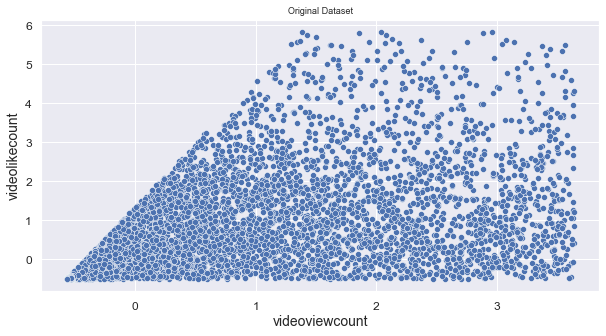

In [43]:
plt.figure(figsize=(10,5))
sns.scatterplot(x="videoviewcount", y="videolikecount", data=df)
plt.title("Original Dataset")
plt.show()

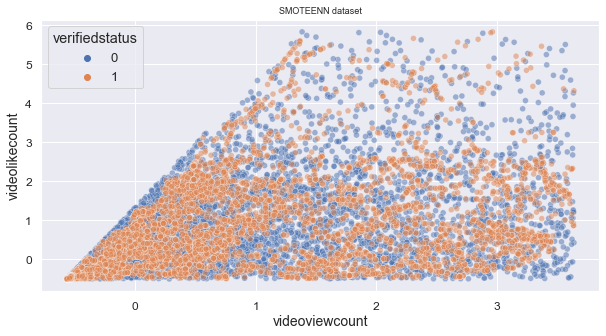

In [44]:
plt.figure(figsize=(10,5))
sns.scatterplot(x="videoviewcount", y="videolikecount", hue=y_smenn, data=X_smenn, alpha=0.5)
plt.title("SMOTEENN dataset")
plt.show()

In [ ]:
# Save the new dataset

df2 = pd.concat([X_smenn,y_smenn], axis=1)
df2

In [ ]:
df2.verifiedstatus.value_counts(normalize=True)

In [ ]:
#df2.to_csv("tiktoksmenn.csv", index=False)

In [ ]:
## SMOTE + Tomek Links

In [ ]:
#set up Tomek Links

tl = TomekLinks(
    sampling_strategy='all',  # resample all classes
    n_jobs=2)  


In [ ]:
smtomek = SMOTETomek(sampling_strategy='auto', random_state=0,
                     smote=sm, tomek=tl, n_jobs=2)

In [ ]:
X_train_smtl, y_train_smtl = smtomek.fit_resample(X_train, y_train)

In [ ]:
# size of oversampled datasets

X_train_sm.shape, X_train_smtl.shape

In [ ]:
# number of minority class observations

y.value_counts(), y_train_sm.value_counts(), y_train_smtl.value_counts()

In [ ]:
# Resample X_test and y_test

X_test_smtl, y_test_smtl = smtomek.fit_resample(X_test, y_test)

In [ ]:
X_test_smtl.shape, y_test_smtl.shape

In [ ]:
X_train_smtl.shape

In [ ]:
X_test_smtl.shape

In [ ]:
#Check the new size dataframe
X_train_smtl.shape[0] + X_test_smtl.shape[0]

In [ ]:
#21662 + 5406

In [ ]:
# L1 regularized logistic regression
logregl1 = LogisticRegression(penalty='l1', C=1.0, class_weight=None,
                              solver='liblinear', max_iter=1000, 
                              random_state=0)

In [ ]:
logregl1.fit(X_train_smtl , y_train_smtl)

In [ ]:
logregl1_pred = logregl1.predict(X_test_smtl)

In [ ]:
logregl1_pred[0:5]

In [ ]:
logregl1.coef_

In [ ]:
logregl1.intercept_

In [ ]:
logregl1.score(X_train_smtl , y_train_smtl)

In [ ]:
logregl1.score(X_test_smtl, y_test_smtl)

In [ ]:
print("Accuracy:", "%.3f" % accuracy_score(y_test_smtl, logregl1_pred))
print("Precision:", "%.3f" % precision_score(y_test_smtl, logregl1_pred))
print("Recall:", "%.3f" % recall_score(y_test_smtl, logregl1_pred))
print("F1 Score:", "%.3f" % f1_score(y_test_smtl, logregl1_pred))
print("ROC-AUC Score:", "%.3f" % roc_auc_score(y_test_smtl, logregl1_pred))

## Logistic Regression (Scikit Learn)

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size

Let's build our model using **LogisticRegression** from the Scikit-learn package. This function implements logistic regression and can use different numerical optimizers to find parameters, including ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’ solvers. You can find extensive information about the pros and cons of these optimizers if you search it in the internet.

The version of Logistic Regression in Scikit-learn, support regularization. Regularization is a technique used to solve the overfitting problem of machine learning models.
**C** parameter indicates **inverse of regularization strength** which must be a positive float. Smaller values specify stronger regularization.

In [51]:
# L1 regularized logistic regression
logregl1 = LogisticRegression(penalty='l1', C=1.0, 
                              solver='liblinear', class_weight=None,
                              max_iter=1000, random_state=0)

In [52]:
logregl1.fit(X_train,y_train)

LogisticRegression(max_iter=1000, penalty='l1', random_state=0,
                   solver='liblinear')

In [53]:
logregl1_pred = logregl1.predict(X_test)

In [54]:
logregl1_pred[0:5]

array([1, 1, 0, 0, 1], dtype=int64)

In [55]:
logregl1.coef_

array([[ 0.06607574, -0.13108196,  0.09092692,  0.02684587, -0.00323503,
        -2.24529261,  0.11454396]])

In [56]:
logregl1.intercept_

array([0.13456368])

In [57]:
logregl1.score(X_train, y_train)

0.6353544822142188

In [58]:
logregl1.score(X_test, y_test)

0.6470007892659826

**==================================================================================================================**

In [59]:
# L2 regularized logistic regression
logregl2 = LogisticRegression(penalty='l2', C=1.0, solver='liblinear', max_iter=500, random_state=0)

In [60]:
logregl2.fit(X_train,y_train)

LogisticRegression(max_iter=500, random_state=0, solver='liblinear')

In [61]:
logregl2_pred = logregl2.predict(X_test)

In [62]:
logregl2_pred[0:5]

array([1, 1, 0, 0, 1], dtype=int64)

In [63]:
logregl2.coef_

array([[ 0.0666222 , -0.13282341,  0.09175485,  0.02756091, -0.00358018,
        -2.24232576,  0.11594993]])

In [64]:
logregl2.intercept_

array([0.13311659])

In [65]:
logregl2.score(X_train, y_train)

0.635453155064384

In [66]:
logregl2.score(X_test, y_test)

0.6471981057616417

### Find best C value

In [ ]:
training_accuracy = []
test_accuracy = []

# try c values from 0.001 to 100:
c_settings = np.arange(0.001, 100, 0.1) 
for i in c_settings:
    # build the model
    clf = LogisticRegression(C=i)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(c_settings, training_accuracy, label="training accuracy")
plt.plot(c_settings, test_accuracy, label="test accuracy")
plt.legend()

### Logistic Model Evaluation

To determine which evaluation metric might be best, consider how our model might be wrong. There are two possibilities for bad predictions: 
  
  - **False positives:** When the model predicts a customer **will** churn when in fact they won't
  - **False negatives:** When the model predicts a customer will **not** churn when in fact they will     

As you know, there are a number of performance metrics aside from accuracy to choose from. Some of these include precision, recall, and F1 score. Let's examine these more closely, beginning with _precision_:

$$precision = \frac{\text{TP}}{\text{FP+TP}}$$
  </br> 

And _recall_: 

$$recall = \frac{\text{TP}}{\text{FN+TP}}$$  
  </br>

<img src = "confusion matrix.png">

Precision represents the percentage of all our model's predicted positives that are true positives. This might not be the best metric for us to use, because it disincentivizes predicting someone will churn unless there is a high degree of certainty that they will. This could translate to a high rate of false negatives.

On the other hand, recall represents the percentage of all actual positives that the model identifies as such. This also might not be the best metric to use, because it rewards predicting someone will churn even if the likelihood of their doing so is very small. This could translate to a high rate of false positives.

So which is worse, false positives or false negatives? Well, we'd first have to define what _worse_ means. This is dependent on the details of the project that you're working on. For the sake of this exercise, let us suppose that we're defining it as the error that would cost the bank more money.

Since we don't know the exact cost of predicting a false negative, we'll make an assumption for this exercise. We'll assume that a metric that balances precision and recall is best. The metric that helps us achieve this balance is _F1 score_, which is defined as the harmonic mean of precision and recall. 

$${F_{1}} = 2 \cdot \frac{precision \cdot  recall}{precision + recall}$$  
</br>
Again, there are many metrics to choose from. The important thing is that you make an informed decision that is based on your use case.

**Question:** What are the four basic parameters for evaluating the performance of a classification model?

1. True positives (TP): These are correctly predicted positive values, which means the value of actual and predicted classes are positive. 

2. True negatives (TN): These are correctly predicted negative values, which means the value of the actual and predicted classes are negative.

3. False positives (FP): This occurs when the value of the actual class is negative and the value of the predicted class is positive.

4. False negatives (FN): This occurs when the value of the actual class is positive and the value of the predicted class in negative. 

**Reminder:** When fitting and tuning classification modeld, data professioals aim to minimize false positives and false negatives.

**Question:**  What do the four scores demonstrate about your model, and how do you calculate them?

- Accuracy (TP+TN/TP+FP+FN+TN): The ratio of correctly predicted observations to total observations. 
 
- Precision (TP/TP+FP): The ratio of correctly predicted positive observations to total predicted positive observations. 

- Recall (Sensitivity, TP/TP+FN): The ratio of correctly predicted positive observations to all observations in actual class.

- F1 score: The harmonic average of precision and recall, which takes into account both false positives and false negatives. 

In [67]:
print(classification_report(y_test,logregl1_pred))

              precision    recall  f1-score   support

           0       0.88      0.40      0.55      2750
           1       0.57      0.94      0.71      2318

    accuracy                           0.65      5068
   macro avg       0.73      0.67      0.63      5068
weighted avg       0.74      0.65      0.62      5068



In [68]:
cm = confusion_matrix(y_test,logregl1_pred)
cm

array([[1106, 1644],
       [ 145, 2173]], dtype=int64)

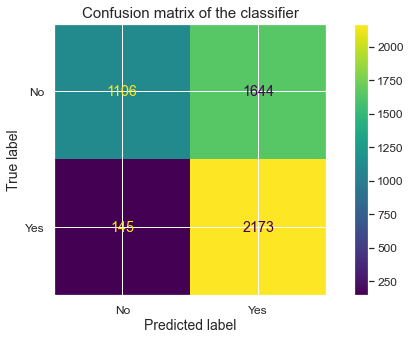

In [69]:
fig, ax = plt.subplots(figsize=(10,5))

ConfusionMatrixDisplay.from_estimator(estimator=logregl1, X=X_test, y=y_test, ax=ax, display_labels=["No","Yes"])
ax.set_title('Confusion matrix of the classifier', size=15)
plt.show()

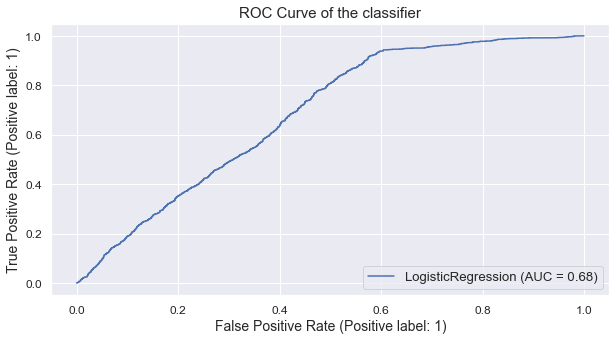

In [70]:
fig, ax = plt.subplots(figsize=(10,5))

RocCurveDisplay.from_estimator(estimator=logregl1, X=X_test, y=y_test, ax=ax)
ax.set_title('ROC Curve of the classifier', size=15)

plt.show()

### Analyze the results

Print out the model's accuracy, precision, recall, and F1 score.

In [71]:
print("Accuracy:", "%.3f" % accuracy_score(y_test, logregl1_pred))
print("Precision:", "%.3f" % precision_score(y_test, logregl1_pred))
print("Recall:", "%.3f" % recall_score(y_test, logregl1_pred))
print("F1 Score:", "%.3f" % f1_score(y_test, logregl1_pred))
print("ROC-AUC Score:", "%.3f" % roc_auc_score(y_test, logregl1_pred))

Accuracy: 0.647
Precision: 0.569
Recall: 0.937
F1 Score: 0.708
ROC-AUC Score: 0.670


**Recall scores are higher with SMOTE-ENN method**

**=================================================================================================================**

## Cross-Validation

When performing supervised machine learning analysis, it is common to withhold a portion of the data to test the final model's performance. This model testing is performed on the 'unseen' data, which the model was not trained on. This withholding of a portion of the dataset for testing is called Cross-Validation. Cross-Validation can also be used to select hyper-parameters and test the final model. In this section, we will focus on the test data only.

Cross-Validation also helps avoid over-fitting; a complex model could repeat the labels of the samples that it has just seen and, therefore, would have a perfect score but would fail to predict anything useful on the 'unseen' data. Furthermore, a complex model could just be modeling noise.

Cross validation method involves dividing the dataset into 3 parts:

*   training set - is a portion of the data used for training the model
*   validation set - is a portion of the data used to optimize the hyper-parameters of the model. This will     be illustrated in the next lab
*   test set - is a portion of the data used to evaluate if the model generalizes enough to work on the     
    data it was not trained on   
    
`Scikit Learn` library contains many methods that can perform the splitting of the data into training, testing and validation sets. The most popular methods that we will cover in this Jupyter Notebook are:

*   train_test_split - creates a single split into train and test sets
*   K-fold - creates number of k-fold splits, allowing cross validation
*   cross_val_score - evaluates model's score through cross validation

[`cross_val_predict`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML240ENSkillsNetwork783-2023-01-01) is a function that does K-fold cross validation for us, appropriately fitting and transforming at every step of the way.

Note that `cross_val_predict` doesn't use the same model for all steps; the predictions for each row are made when that row is in the validation set. We really have the collected results of 3 (i.e. `kf.num_splits`) different models. 

When we are done, `estimator` is still not fitted. If we want to predict on _new_ data, we still have to train our `estimator`.

### K Fold Cross Validation

Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample.

The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. As such, the procedure is often called k-fold cross-validation. When a specific value for k is chosen, it may be used in place of k in the reference to the model, such as k=5 becoming 5-fold cross-validation, as shown in the Diagram below. In this case, we would use K-1 (or 4 folds) for testing a 1 fold for training. K-fold is also used for hyper-parameters selection that we will discuss later.

<img src="k-fold.png">
<img src = "cross_validation_diagram.png">

In many cases, we would like to train models that are not available in Scikit-learn or are too large to fit in the memory. We can create a `KFold` object that  Provides train/test indices to split data into train/test sets in an iterative manner.

`n_splits`:  A number of folds. Must be at least 2. Changed in version 0.22: n_splits default value changed from 3 to 5.

`shuffle`: Indicates whether to shuffle the data before splitting into batches. Note, the samples within each split will not be shuffled.

`random_state`: the random state.

### Estimate the generalization error of a machine learning model using Cross-Validation Schemes

In [72]:
# K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=0)

In [73]:
# estimate generalization error
clf = cross_validate(estimator=logregl1,
                    X=X_train,
                    y=y_train,
                    scoring='roc_auc',
                    return_train_score=True,
                    cv=kf)

In [74]:
# mean test set roc-auc
clf["test_score"].mean()

0.6763482182179725

In [75]:
# mean train set roc-auc
clf["train_score"].mean()

0.679079629223066

**=================================================================================================================**

# Feature selection

Feature selection is the process of choosing features to be used for modeling. In practice, feature selection takes place at multiple points in the PACE process. Although sometimes you will be given a dataset and a defined target variable, most often in practice you will begin with only a question or a problem that you are tasked with solving. In these cases, if you decide that the problem requires a model, you'll then have to:

* Consider what data is available to you
* Decide on what kind of model you need
* Decide on a target variable
* Assemble a collection of features that you think might help predict on your chosen target

This would all take place during the **Plan** phase. 

Then, during the **Analyze** phase, you would perform EDA on the data and reevaluate your variables for appropriateness. For example, can your model handle null values? If not, what do you do with features with a lot of nulls? Perhaps you drop them. This too is feature selection.

But it doesn't end there. Feature selection also occurs during the **Construct** phase. This usually involves building a model, examining which features are most predictive, and then removing the unpredictive features.

There's a lot of work involved in feature selection. In our case, we already have a dataset, and we're not performing thorough EDA on it. But we can still examine the data to ensure that all the features can reasonably be expected to have predictive potential. 

# Filter Methods (Basics)

### Variance Threshold (Numeric Only)

Remember we should apply the variance filter only on numerical variables.

Default Value of Threshold is 0

    If Variance Threshold = 0 (Remove Constant Features )
    If Variance Threshold > 0 (Remove Quasi-Constant Features )


In [ ]:
# threshold_n=0.95

# vt = VarianceThreshold(threshold=(threshold_n* (1 - threshold_n) ))

In [ ]:
#vtfit = vt.fit(X,y)

In [ ]:
#vtfit.variances_

In [ ]:
#vt.get_support()

In [ ]:
#vt.get_feature_names_out()

### Constant and Quasi-constant features with Feature-engine

In this notebook, we will remove constant and quasi-constant features utilizing the new functionality from Feature-engine.

In [ ]:
df.shape

In [ ]:
df.head()

In [ ]:
X = df.iloc[:,0:11]
y = df.iloc[:,11]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [ ]:
X_train.values, y_train.values

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

### Remove constant features

The DropConstantFeatures class from Feature-engine finds and removes constant and quasi-constant features from a dataset. We can remove constant features by setting the parameter tol to 1, or quasi-constant with smaller values for tol.

In [ ]:
sel = DropConstantFeatures(tol=1, variables=None, missing_values='raise')

In [ ]:
sel.fit(X_train)

In [ ]:
# list of constant features

sel.features_to_drop_

In [ ]:
# remove constant features from the data

X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

X_train.shape, X_test.shape

### Remove quasi-constant features

In [ ]:
sel = DropConstantFeatures(tol=0.90, variables=None, missing_values='raise') #90% majority observations

In [ ]:
sel.fit(X_train)

In [ ]:
# list of quasi-constant features

sel.features_to_drop_

In [ ]:
# percentage of observations showing each of the different values
# of the variable

var = sel.features_to_drop_[0]

X_train[var].value_counts(normalize=True)

In [ ]:
#remove the quasi-constant features

X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

In [ ]:
X_train.shape, X_test.shape

### Duplicated features with Feature-engine

In this notebook, we will identify and remove duplicated features with Feature-engine.

In [ ]:
# set up the selector
sel = DropDuplicateFeatures(variables=None, missing_values='raise')

In [ ]:
# find the duplicate features, this might take a while
sel.fit(X_train)

In [ ]:
# these are the pairs of duplicated features
# each set are duplicates

sel.duplicated_feature_sets_

In [ ]:
# these are the features that will be dropped
# 1 from each of the pairs above

sel.features_to_drop_

In [ ]:
# remove the duplicated features

X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

In [ ]:
X_train.shape, X_test.shape

**=================================================================================================================**

# Filter Methods (Correlation)

Correlation Feature Selection evaluates subsets of features on the basis of the following hypothesis: "Good feature subsets contain features highly correlated with the target, yet uncorrelated to each other".

### Correlation with Feature-engine

- The DropCorrelatedFeatures class from Feature-engine does a similar job to the brute force approach that we described earlier.

- The SmartCorrelationSelection allows us to select a feature from each correlated group based on model performance, number of missing values, cardinality or variance.

In [ ]:
# set up the selector

sel = DropCorrelatedFeatures(
    threshold=0.8,
    method='pearson',
    missing_values='ignore'
)

In [ ]:
# find correlated features

sel.fit(X_train)

In [ ]:
# each set contains a group of correlated features

sel.correlated_feature_sets_

In [ ]:
# drop correlated features

X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

## SmartCorrelationSelection

### Model Performance

We will keep a feature from each correlation group based on the performance of a model.

In [ ]:
logreg = LogisticRegression()

In [ ]:
# correlation selector
sel = SmartCorrelatedSelection(
    variables=None, # if none, selector examines all numerical variables
    method="pearson",
    threshold=0.8,
    missing_values="raise",
    selection_method="model_performance",
    estimator=logreg,
    scoring="roc_auc",
    cv=5
)

In [ ]:
# this may take a while, because we are training
# a random forest per correlation group

sel.fit(X_train, y_train)

In [ ]:
# groups of correlated features

sel.correlated_feature_sets_

In [ ]:
df[{'textlength', 'wordcounts'}].corr()

**In this group, several features are highly correlated. Which one should we keep and which ones should we remove?**

One criteria to select which features to use from this group, would be to use those with **less missing data**. 

Our dataset contains no missing values, so this is not an option. But keep this in mind when you work with your own datasets.

**Note**

None of the 2 procedures for removing correlated features are perfect, and some correlated features may escape the loops of code. So it might be worthwhile checking that after removing the correlated features, there are no correlated features left in the dataset. If there are, repeat the procedure to remove the remaining ones.

**=================================================================================================================**

# Filter Methods (Statistical Tests)

## Mutual information

The mutual information measures the reduction in uncertainty in variable A when variable B is known. 

To select variables, we are interested in the mutual information between the predictor variables and the target. Higher mutual information values, indicate little uncertainty about the target Y given the predictor X.


In [ ]:
# determine the mutual information
mi = mutual_info_classif(X_train, y_train)

# and make a bar  plot
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False).plot.bar(figsize=(20,6))
plt.xticks(rotation=45)
plt.ylabel('Mutual Information')
plt.show()

In [ ]:
# here we will select the top 10 features
# based on their mutual information value

# select features
selkbest = SelectKBest(mutual_info_classif, k=5)

In [ ]:
selkbest.fit(X_train, y_train)

In [ ]:
# display features
X_train.columns[selkbest.get_support()]

In [ ]:
# to remove the rest of the features:

X_train = selkbest.transform(X_train)
X_test = selkbest.transform(X_test)

In [ ]:
X_train.shape, X_test.shape    # Can start training ML models

In [ ]:
# Select the features in the top percentile
selpercent = SelectPercentile(mutual_info_classif, percentile=30) # Based on no of features to decide

In [ ]:
selpercent.fit(X_train, y_train)

In [ ]:
# display the features
X_train.columns[selpercent.get_support()]

In [ ]:
# to remove the rest of the features:

X_train = selpercent.transform(X_train)
X_test = selpercent.transform(X_test)

## Univariate feature selection

Univariate feature selection works by selecting the best features based on univariate statistical tests (ANOVA). The methods estimate the degree of linear dependency between two random variables. In this case, any of the predictor variables and the target. 

ANOVA assumes a linear relationship between the feature and the target and that the variables follow a Gaussian distribution. If this is not true, the result of this test may not be useful.

These may not always be the case for the variables in your dataset, so if looking to implement these procedure, you will need to corroborate these assumptions.

In [ ]:
# univariate anova
univariate = f_classif(X_train, y_train)

# plot values
univariate = pd.Series(univariate[1])
univariate.index = X_train.columns
univariate.sort_values(ascending=False).plot.bar(figsize=(20,6))
plt.show()

In [ ]:
# select the top 10 features
selkbest = SelectKBest(f_classif, k=5)

In [ ]:
selkbest.fit(X_train, y_train)

In [ ]:
# display selected feature names
X_train.columns[selkbest.get_support()]

In [ ]:
# to remove the rest of the features:

X_train = selpercent.transform(X_train)
X_test = selpercent.transform(X_test)

In [ ]:
X_train.shape, X_test.shape

In [ ]:
# select features in top 10th percentile
selpercent= SelectPercentile(f_classif, percentile=30)

In [ ]:
selpercent.fit(X_train, y_train)

In [ ]:
# display selected feature names
X_train.columns[selpercent.get_support()]

In [ ]:
# to remove the rest of the features:

X_train = selpercent.transform(X_train)
X_test = selpercent.transform(X_test)

In [ ]:
X_train.shape, X_test.shape

**=================================================================================================================**

# Filter Methods (Other Methods)

## Univariate Performance with Feature-engine

This procedure works as follows:

- Train a ML model per every single feature
- Determine the performance of the models
- Select features if model performance is above a certain threshold

The C value in Logistic Regression is an user adjustable parameter that controls regularisation. In simple terms, higher values of C will instruct our model to fit the training set as best as possible, while lower C values will favour a simple models with coefficients closer to zero.


In [ ]:
# set up the machine learning model
lr = LogisticRegression(penalty='l2', C=1000, random_state=0, solver='lbfgs', max_iter=1000)

In [ ]:
# set up the selector
sel = SelectBySingleFeaturePerformance(
    variables=None,
    estimator=lr,
    scoring="roc_auc",
    cv=5,
    threshold=0.5
)

In [ ]:
# find predictive features
sel.fit(X_train, y_train)

In [ ]:
# the transformer stores a dictionary of feature:metric pairs
# notice that the roc can be positive or negative.
# the selector selects based on the absolute value

#In general, an AUC of 0.5 suggests no discrimination 
#(i.e., ability to diagnose patients with and without the disease or condition based on the test), 
#0.7 to 0.8 is considered acceptable, 0.8 to 0.9 is considered excellent, and more than 0.9 is considered outstanding

sel.feature_performance_

In [ ]:
pd.Series(sel.feature_performance_).sort_values(ascending=False).plot.bar(figsize=(20, 5))
plt.title('Performance of ML models trained with individual features', size=15)
plt.xticks(rotation=45)
plt.ylabel('ROC Score')
plt.show()

In [ ]:
# same plot but taking the absolute value of the r2

# np.abs(pd.Series(sel.feature_performance_)).sort_values(ascending=False).plot.bar(figsize=(20, 5))
# plt.title('Performance of ML models trained with individual features', size=15)
# plt.ylabel('ROC Score')
# plt.show()

In [ ]:
# the features that will be removed

sel.features_to_drop_

In [ ]:
# select features in the dataframes

X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

In [ ]:
X_train.shape, X_test.shape

In [ ]:
X_train.columns

**=================================================================================================================**

# Embedded Methods (Linear Models)

## Logistic Regression Coefficients

Linear regression predicts a quantitative response Y on the basis of predictor variables X1, X2, ... Xn. It assumes that there is a linear relationship between X(s) and Y. Mathematically, we write this linear relationship as Y ≈ β0 + β1X1 + β2X2 + ... + βnXn.

**The magnitude of the coefficients is directly influenced by the scale of the features**. Therefore, to compare coefficients across features, it is important that all features are on a similar scale. This is why normalisation is important for variable importance and feature selection in linear models.

Linear Regression makes the following assumptions:

- There is a linear relationship betweent the predictors Xs and the outcome Y

- The residuals follow a normal distribution centered at 0

- There is little or no multicollinearity among predictors (Xs should not be linearly related to one another)

- Homoscedasticity (variance should be the same)


### SelectFromModel

In [ ]:
# we train a Linear regression model and select
# features with higher coefficients.

# the LinearRegression object from sklearn is a non-regularised
# linear method. It fits by matrix multiplication and not 
# gradient descent.

# therefore we don't need to specify penalty and other parameters

selfm = SelectFromModel(LogisticRegression(C=1000, penalty='l2', max_iter=300, random_state=0))

In [ ]:
selfm.fit(X_train,y_train)

In [ ]:
# let's count the number of variables selected
selected_feat = X_train.columns[(selfm.get_support())]

len(selected_feat)

In [ ]:
selected_feat

In [ ]:
selected_feat.shape

In [ ]:
# X_coeff = X[[selected_feat]]

In [ ]:
# After feature selection
# X_train, X_test, y_train, y_test = train_test_split(X_coeff, y, test_size=0.2, random_state=0)

### Drop unwanted features (After feature selection)

In [ ]:
df.head(1)

In [ ]:
df.columns

In [ ]:
df.drop(['videodurationsec', 'videocommentcount'], axis=1, inplace=True)

In [ ]:
df.head()

In [ ]:
#df.to_csv("tiktokmod.csv", index=False)

**=================================================================================================================**

#### Python code done by Dennis Lam